In [ ]:
# cell-collective-basin-entropy.ipynb
#
# Bryan Daniels
# 2023/11/8
#
# Does basin entropy act as a "higher-order correction" to the expected 
# control kernel size in the cell collective networks?

# Load network data from 2019 sensitivity paper

In [104]:
import glob
import os
from toolbox.simplePickle import load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import InfEst
import plotly.express as px # interactive 3D plots

In [2]:
cell_collective_data_directory = '/Users/bdaniel6/ASUDropbox/Research/grn-survey/data/'

In [3]:
landscape_data = {}
for directory in glob.glob(cell_collective_data_directory+"/*"):
    name = os.path.split(directory)[-1]
    ls_file = directory+"/landscape.dat"
    if os.path.isfile(ls_file):
        print("Loading landscape data for {}".format(name))
        landscape_data[name] = load(ls_file)

Loading landscape data for Vegf_Pathway_Of_Drosophila_Signaling_Pathway
Loading landscape data for Cortical_Area_Development
Loading landscape data for B_Cell_Differentiation
Loading landscape data for BT474_Breast_Cell_Line_Short-term_ErbB_Network
Loading landscape data for HCC1954_Breast_Cell_Line_Short-term_ErbB_Network
Loading landscape data for Fanconi_Anemia_And_Checkpoint_Recovery
Loading landscape data for Body_Segmentation_In_Drosophila_2013
Loading landscape data for Oxidative_Stress_Pathway
Loading landscape data for Iron_Acquisition_And_Oxidative_Stress_Response_In_Aspergillus_Fumigatus
Loading landscape data for Lac_Operon
Loading landscape data for Cardiac_Development
Loading landscape data for Mammalian_Cell_Cycle
Loading landscape data for Budding_Yeast_Cell_Cycle_2009
Loading landscape data for Metabolic_Interactions_In_The_Gut_Microbiome
Loading landscape data for Mammalian_Cell_Cycle_2006
Loading landscape data for CD4+_T_Cell_Differentiation_And_Plasticity
Loading l

In [4]:
landscape_data['Cortical_Area_Development']

{'attractors': array([[ 3],
        [28]]),
 'basin entropy': 0.5435644431995964,
 'basins': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0]),
 'heights': array([2, 1, 2, 0, 4, 4, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 2, 2, 4, 4,
        3, 3, 3, 3, 3, 3, 0, 2, 3, 3]),
 'recurrence times': array([2, 1, 2, 0, 4, 4, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 2, 2, 4, 4,
        3, 3, 3, 3, 3, 3, 0, 2, 3, 3]),
 'in-degrees': array([14,  6,  0,  2,  0,  0,  0,  0,  4,  0,  0,  0,  2,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0])}

In [5]:
# standardize names and extract basin entropies
standard_name_list = []
basin_entropies_list = []
for name in landscape_data.keys():
    standard_name_list.append( name.replace('_',' ') )
    #print(name)
    if 'basin entropy' in landscape_data[name]: # some are 'basin entropy' and some b'basin entropy'...
        basin_entropies_list.append(landscape_data[name]['basin entropy'])
    else:
        basin_entropies_list.append(landscape_data[name][b'basin entropy'])
        
# make pandas series
basin_entropies = pd.Series(basin_entropies_list,index=standard_name_list)

In [6]:
print("We have old basin entropy data for {} networks".format(len(landscape_data)))

We have old basin entropy data for 21 networks


# Load control kernel data from 2021 control kernel paper

In [7]:
control_kernel_data_file = '/Users/bdaniel6/ASUDropbox/Research/grn-survey/Writeups/control-kernel-2020/Nature Comm final revision Aug 2021/zenodo Aug 2021/20200820_control_kernel_supplemental_info.csv'

In [8]:
ck_df = pd.read_csv(control_kernel_data_file).set_index('name')

In [9]:
print("We have exact control kernel data for {} networks".format((1-ck_df['uses sampling method']).sum()))

We have exact control kernel data for 44 networks


In [10]:
# combine with basin entropy data
ck_df['basin entropy'] = basin_entropies

# include expected average ck size and difference from expected
ck_df['expected mean control kernel size'] = np.log2(ck_df['number of attractors'])
ck_df['difference from expected mean control kernel size'] = \
    ck_df['mean control kernel size'] - ck_df['expected mean control kernel size']

In [11]:
ck_df.sort_values('difference from expected mean control kernel size')

,size,number of attractors,number of attractors with control kernel,mean control kernel size,std control kernel size,number of input nodes,uses sampling method,number of uncontrollable attractors,fraction of uncontrollable attractors,number of cycles,number of modules,paper citation,url to paper,url to cell collective model,basin entropy,expected mean control kernel size,difference from expected mean control kernel size
name,,,,,,,,,,,,,,,,,
Cholesterol Regulatory Pathway,34,21,4,2.250000,0.433013,2,True,17,0.809524,17,NaN,Kervizic G and Corcos L.Dynamical modeling of ...,https://bmcsystbiol.biomedcentral.com/articles...,https://cellcollective.org/#2172/cholesterol-r...,NaN,4.392317,-2.142317
Death Receptor Signaling,28,97,27,4.740741,0.797802,3,False,70,0.721649,70,10.0,"Calzone L, Tournier L, Fourquet S, Thieffry D,...",http://journals.plos.org/ploscompbiol/article?...,https://cellcollective.org/#2084/death-recepto...,NaN,6.599913,-1.859172
Septation Initiation Network,31,2240,640,9.400000,0.489898,8,False,1600,0.714286,1600,18.0,"Chasapi A, Wachowicz P, Niknejad A, Collin P, ...",http://journals.plos.org/plosone/article?id=10...,https://cellcollective.org/#4705:1/septation-i...,NaN,11.129283,-1.729283
Guard Cell Abscisic Acid Signaling,44,95,38,5.421053,0.674013,4,False,57,0.600000,84,25.0,"Li S, Assmann SM, and Albert R. Predicting ess...",http://journals.plos.org/plosbiology/article?i...,https://cellcollective.org/#2161:1/guard-cell-...,NaN,6.569856,-1.148803
Tumour Cell Invasion And Migration,32,15,9,3.333333,0.666667,2,False,6,0.400000,6,13.0,"Cohen DP, Martignetti L, Robine S, Barillot E,...",http://journals.plos.org/ploscompbiol/article?...,https://cellcollective.org/#5884/tumour-cell-i...,NaN,3.906891,-0.573557
Trichostrongylus Retortaeformis,26,12,6,3.166667,0.897527,1,False,6,0.500000,6,3.0,"Thakar J, Pathak AK, Murphy L, Albert R, and C...",http://journals.plos.org/ploscompbiol/article?...,https://cellcollective.org/#3493/trichostrongy...,NaN,3.584963,-0.418296
Regulation Of The L-arabinose Operon Of Escherichia Coli,13,21,17,4.117647,0.322190,4,False,4,0.190476,4,9.0,Jenkins A and Macauley M.Bistability and Async...,https://link.springer.com/article/10.1007%2Fs1...,https://cellcollective.org/#6885:1/regulation-...,NaN,4.392317,-0.274670
Budding Yeast Cell Cycle,20,33,21,4.809524,0.587087,4,False,12,0.363636,13,6.0,Todd RG and Helikar T.Ergodic sets as cell phe...,http://journals.plos.org/plosone/article?id=10...,https://cellcollective.org/#2404/budding-yeast...,4.698149,5.044394,-0.234870
T-Cell Signaling 2006,40,10,7,3.142857,0.349927,3,False,3,0.300000,3,34.0,"Klamt S, Saez-Rodriguez J, Lindquist JA, Simeo...",https://bmcbioinformatics.biomedcentral.com/ar...,https://cellcollective.org/#2691:1/tcell-signa...,NaN,3.321928,-0.179071


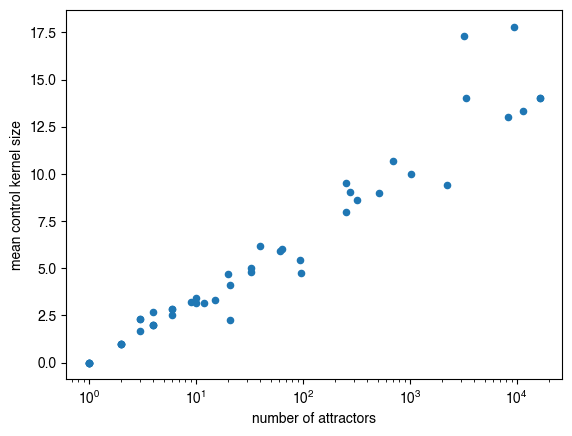

In [12]:
ck_df.plot.scatter('number of attractors','mean control kernel size')
plt.xscale('log')

(1.0, 20000.0, -0.4, 8.4)

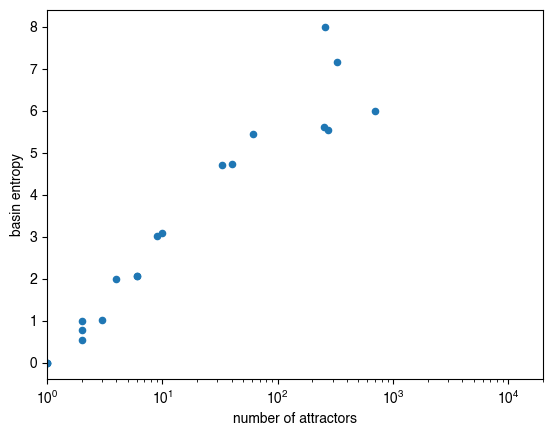

In [13]:
ck_df.plot.scatter('number of attractors','basin entropy')
plt.xscale('log')
plt.axis(xmin=1,xmax=2e4)

<Axes: xlabel='basin entropy', ylabel='difference from expected mean control kernel size'>

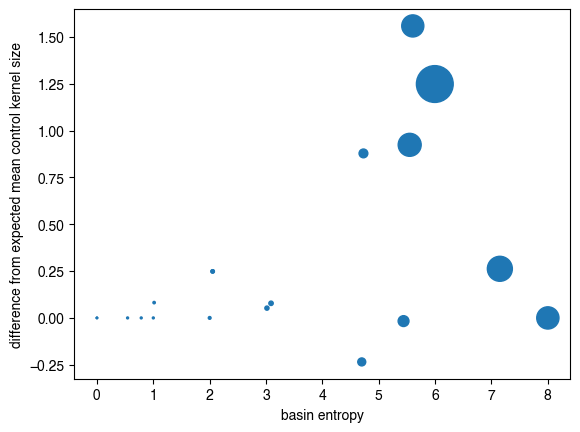

In [14]:
ck_df.plot.scatter('basin entropy','difference from expected mean control kernel size',
                     s='number of attractors')
#plt.axis(ymax=5)

In [65]:
8.9/np.log2(3300)

0.7614484430612815

# 2023/12/8 Load data from new sampled basin entropy runs

In [15]:
datadir = '../code/'

In [16]:
# concatenate all csv file data
df_list = []
for filename in glob.glob(datadir+'basin_entropy_data*.csv'):
    df_single = pd.read_csv(filename)
    df_list.append(df_single)
df = pd.concat(df_list).set_index('name')
#df = df.apply(pd.to_numeric,errors='coerce')
# make everything numeric except for "elapsed_time"
numeric_cols = df.columns[df.columns != 'elapsed_time']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df

,network_size,num_states,num_samples,num_attractors,basin_entropy_NSB,std_basin_entropy_NSB,elapsed_time
name,,,,,,,
Budding_Yeast_Cell_Cycle,20,1048576,10000,33,4.694115e+00,0.008376,0:00:17.791724
Mammalian_Cell_Cycle,20,1048576,10000,3,1.015631e+00,0.003329,0:00:02.010877
HCC1954_Breast_Cell_Line_Long-term_ErbB_Network,25,33554432,10000,9452,8.292196e+00,0.021588,0:22:40.463293
Cortical_Area_Development,5,32,10000,2,5.684643e-01,0.155180,0:00:00.615673
B_Cell_Differentiation,22,4194304,10000,61,5.442298e+00,0.008888,0:00:04.356118
Predicting_Variabilities_In_Cardiac_Gene,15,32768,10000,6,2.060251e+00,0.005312,0:00:01.715593
Pro-inflammatory_Tumor_Microenvironment_In_Acute_Lymphoblastic_Leukemia,26,67108864,10000,6,2.445425e+00,0.005829,0:09:41.139617
T-LGL_Survival_Network_2011_Reduced_Network,18,262144,10000,3,1.800923e-01,0.008861,0:00:01.288083
Processing_Of_Spz_Network_From_The_Drosophila_Signaling_Pathway,24,16777216,10000,64,5.998865e+00,0.000515,0:00:13.801662


In [17]:
print("We have sampled basin entropy data for {} networks".format(len(df)))

We have sampled basin entropy data for 28 networks


In [18]:
from InfEst.entropyEstimates import naiveEntropy

In [19]:
# gather all detailed basin data into a dictionary
basinDataDict = {}
for name in df.index:
    data = load('{}basin_entropy_data_{}.pkl'.format(datadir,name))
    basinDataDict[name] = data

In [20]:
# also compute "naive" basin entropies (which are "exact" when num_samples > num_states)
for name in df.index:
    data = basinDataDict[name]
    basin_counts = data['sampled_basin_freqs']
    naive_entropy = naiveEntropy(basin_counts/np.sum(basin_counts))
    df.loc[name,'basin_entropy_naive'] = naive_entropy
    df.loc[name,'min_basin_count'] = min(basin_counts)

/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/scimath.py:434: RuntimeWarning: divide by zero encountered in log2
  return nx.log2(x)
/Users/bdaniel6/packages/InfEst/InfEst/entropyEstimates.py:23: RuntimeWarning: invalid value encountered in multiply
  return -scipy.sum( scipy.nan_to_num(dist*scipy.log2(dist)) )


In [21]:
def directory_name(name):
    """
    Returns the name of the Cell Collective directory given the "nice" name with spaces
    """
    return name.replace(' ','_').replace('.','')

In [22]:
def nice_name(name):
    """
    Returns the "nice" name of the Cell Collective network given the directory name
    """
    return name.replace('_',' ')

In [23]:
# check directory_names
for name in ck_df.index:
    dir_name = directory_name(name)
    if not os.path.isdir('../../Data/Cell Collective/{}/'.format(dir_name)):
        print("{} isn't right!".format(dir_name))

In [24]:
# incorporate control kernel data from above

# first get new names
ck_df['name'] = ck_df.index
ck_df['directory_name'] = ck_df['name'].apply(directory_name)

# then copy 
columns_to_copy = ['mean control kernel size',
                   'expected mean control kernel size',
                   'difference from expected mean control kernel size']
df[columns_to_copy] = ck_df.set_index('directory_name')[columns_to_copy] 

In [25]:
# other potentially useful stuff
df['max_basin_entropy'] = np.log2(np.array(df['num_attractors']))
df['fraction_of_max_basin_entropy'] = df['basin_entropy_NSB']/df['max_basin_entropy']
df['fractional difference from expected mean control kernel size'] = \
    df['difference from expected mean control kernel size'] / df['expected mean control kernel size']

(0.0, 12.0, -0.4264994220962657, 12.91367974853721)

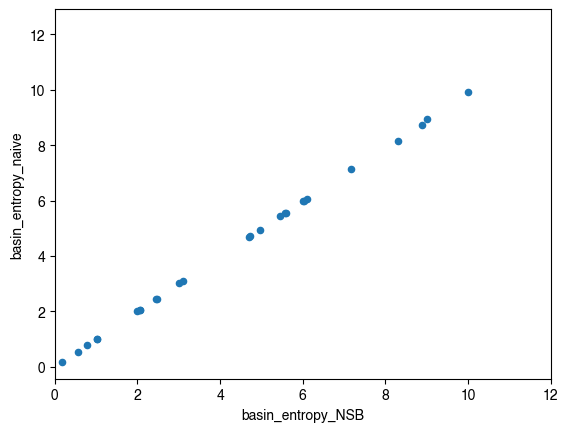

In [26]:
df.plot.scatter('basin_entropy_NSB','basin_entropy_naive')
plt.axis(xmin=0,xmax=12)

(0.0, 12.0, -0.7231495215499524, 5.983631603350229)

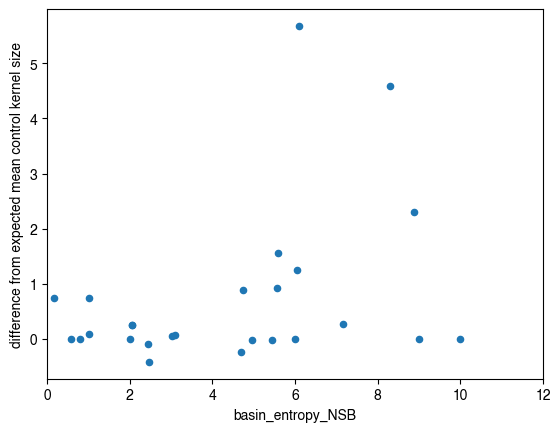

In [27]:
df.plot.scatter('basin_entropy_NSB',
                'difference from expected mean control kernel size')
plt.axis(xmin=0,xmax=12)

(0.0, 1.0, -0.7231495215499524, 5.983631603350229)

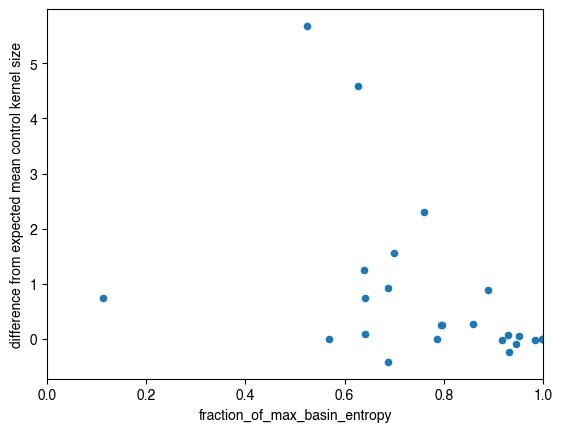

In [28]:
df.plot.scatter('fraction_of_max_basin_entropy',
                'difference from expected mean control kernel size')
plt.axis(xmin=0,xmax=1)

(0.0, 1.0, -0.1469142073854364, 0.5182235687895429)

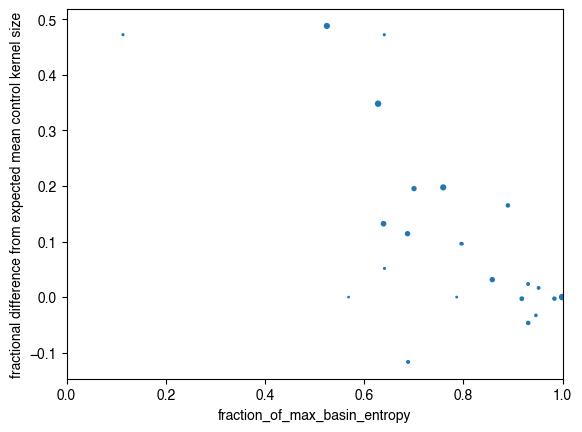

In [110]:
df.plot.scatter('fraction_of_max_basin_entropy',
                'fractional difference from expected mean control kernel size',
                s='expected mean control kernel size')
plt.axis(xmin=0,xmax=1)

In [119]:
import scipy.stats

In [121]:
# is there a significant correlation?
print(scipy.stats.spearmanr(df['fraction_of_max_basin_entropy'],
                      df['fractional difference from expected mean control kernel size']))
print(scipy.stats.pearsonr(df['fraction_of_max_basin_entropy'],
                      df['fractional difference from expected mean control kernel size']))

SignificanceResult(statistic=-0.6301452442428532, pvalue=0.00042713007633184326)
PearsonRResult(statistic=-0.7064335093365839, pvalue=3.819934268808739e-05)


In [101]:
# drop case with numerical error
df = df[df['basin_entropy_NSB'] < 1e5]

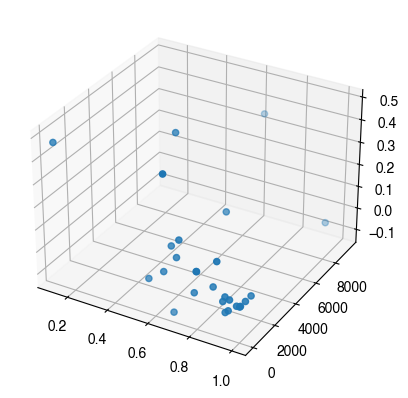

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['fraction_of_max_basin_entropy'], 
           df['num_attractors'], 
           df['fractional difference from expected mean control kernel size'])

In [111]:
df.columns

Index(['network_size', 'num_states', 'num_samples', 'num_attractors',
       'basin_entropy_NSB', 'std_basin_entropy_NSB', 'elapsed_time',
       'basin_entropy_naive', 'min_basin_count', 'mean control kernel size',
       'expected mean control kernel size',
       'difference from expected mean control kernel size',
       'max_basin_entropy', 'fraction_of_max_basin_entropy',
       'fractional difference from expected mean control kernel size'],
      dtype='object')

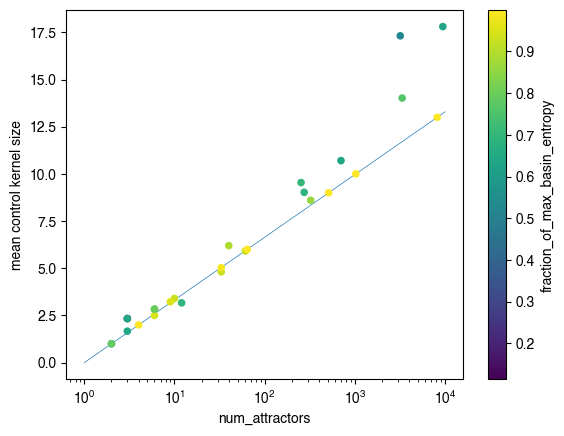

In [117]:
df.plot.scatter('num_attractors','mean control kernel size',c='fraction_of_max_basin_entropy')
plt.xscale('log')
plt.plot(np.arange(1,10000),np.log2(np.arange(1,10000)),lw=0.5,zorder=-1)

In [122]:
# save network data as csv
df.to_csv('231212_basin_entropy_and_ck_data_by_network.csv')

# 2023/12/11 try correlating control kernel sizes and basin sizes for individual attractors

In [30]:
import neet.controlkernel.modularity as md

In [ ]:
# first load the exact control kernel data for individual attractors (from 2020 data)

In [31]:
# modified from grn-survey/scripts/modularity/load_control_kernel_data.py
def loadDataExact(dir='.'):
    dataDict = {}
    dataForFrame = [] #dataDictForFrame = {}
    for filename in glob.glob(dir+'/control_kernel_*.dat'):
        if filename.find('split') == -1: # we don't want to include "split" data
            try:
                d = load(filename)
                success = True
            except:
                print("loadDataExact: Error loading file {}".format(filename))
                success = False
        else:
            success = False
            
        if success:
            # attempting to cure problems with loading python 2 data
            for key in list(d.keys()):
                if type(key) == bytes:
                    d[key.decode()] = d[key]
        
            dataDict[d['name']] = d
            
            # 2023/12/11 we will skip creating the dataFrame for now
            #ddata = dataFrameExact(d)
            #
            #if len(ddata) > 0:
            #    dataForFrame.append(ddata) #dataDictForFrame[d['name']] = ddata

    #df = pd.DataFrame.from_records(dataForFrame) #,'index') # from_dict
    #df.set_index('name',inplace=True)
    return dataDict #,df

In [32]:
exactDataDir = '/Users/bdaniel6/ASUDropbox/Shared/GRNs/DATA/20200820-control-kernels/'
dataDictExact = loadDataExact(exactDataDir)

In [35]:
basinDataDict['Cortical_Area_Development']

{'name': 'Cortical_Area_Development',
 'network_size': 5,
 'num_states': 32,
 'attractors': array([[ 3],
        [28]]),
 'num_attractors': 2,
 'num_samples': 10000,
 'sampled_basin_freqs': [28, 4],
 'basin_entropy_NSB': 0.5684643218360583,
 'std_basin_entropy_NSB': 0.1551796050704989,
 'elapsed_time': datetime.timedelta(microseconds=615673)}

In [61]:
# for each of the networks for which we have sampled basin size data, find the 
# corresponding control kernel sizes for each attractor

# NOTE!  THE ATTRACTORS IN BASIN DATA APPEAR TO BE THE REVERSE OF ATTRACTORS IN CONTROL KERNEL DATA?

# NOTE!  WE SKIP UNCONTROLLABLE ATTRACTORS

# we'll make long lists of (relative) basin sizes and (relative) control kernel sizes
network_names,basin_sizes,ck_sizes,relative_basin_sizes,relative_ck_sizes = [],[],[],[],[]
relative_basin_sizes_laplace = []
for name in basinDataDict:
    
    basinData = basinDataDict[name]
    ckData = dataDictExact[nice_name(name)]
    
    # save some useful quantities
    total_basin_samples = np.sum(basinData['sampled_basin_freqs'])
    num_attractors = basinData['num_attractors']
    
    ck_data_attIDs = [ md.attractor_ID(att) for att in ckData['attractors'] ]
    for basin_att_index,basin_att in enumerate(basinData['attractors']):
        basin_attID = md.attractor_ID(basin_att)
        # find corresponding attractor in control kernel data
        ck_att_index = ck_data_attIDs.index(basin_attID)
        
#         print(basinData['attractors'][basin_att_index])
#         print(ckData['attractors'][ck_att_index])
#         print()
        
        # sanity check that these attractors are indeed equivalent
        assert(md.attractors_equivalent(basinData['attractors'][basin_att_index],
                                        ckData['attractors'][ck_att_index][::-1]))
        
        # skip uncontrollable attractors (with size None)
        if ckData['control_kernel_sizes'][ck_att_index]:
        
            # do some basic computations
            basin_size = basinData['sampled_basin_freqs'][basin_att_index]
            relative_basin_size = basin_size/total_basin_samples
            relative_basin_size_laplace = (basin_size + 1)/(total_basin_samples + num_attractors)
            ck_size = ckData['control_kernel_sizes'][ck_att_index]
            relative_ck_size = ck_size/ck_df.loc[nice_name(name),'expected mean control kernel size']

            # append data
            network_names.append(name)
            basin_sizes.append(basin_size)
            relative_basin_sizes.append(relative_basin_size)
            relative_basin_sizes_laplace.append(relative_basin_size_laplace)
            ck_sizes.append(ck_size)
            relative_ck_sizes.append(relative_ck_size)

In [62]:
combined_df = pd.DataFrame(np.transpose([network_names,
                                         basin_sizes,
                                         relative_basin_sizes,
                                         relative_basin_sizes_laplace,
                                         ck_sizes,
                                         relative_ck_sizes]),
                          columns=['network_name',
                                   'sampled_basin_freq',
                                   'relative_sampled_basin_freq',
                                   'relative_sampled_basin_freq_laplace',
                                   'control_kernel_size',
                                   'relative_control_kernel_size'])

In [63]:
# pandas is annoying
for col in ['sampled_basin_freq',
            'relative_sampled_basin_freq',
            'relative_sampled_basin_freq_laplace',
            'control_kernel_size',
            'relative_control_kernel_size']:
    combined_df[col] = pd.to_numeric(combined_df[col])

In [64]:
combined_df

,network_name,sampled_basin_freq,relative_sampled_basin_freq,relative_sampled_basin_freq_laplace,control_kernel_size,relative_control_kernel_size
0,Budding_Yeast_Cell_Cycle,589,0.0589,0.058806,4,0.792959
1,Budding_Yeast_Cell_Cycle,625,0.0625,0.062394,4,0.792959
2,Budding_Yeast_Cell_Cycle,103,0.0103,0.010366,5,0.991199
3,Budding_Yeast_Cell_Cycle,36,0.0036,0.003688,5,0.991199
4,Budding_Yeast_Cell_Cycle,90,0.0090,0.009070,5,0.991199
...,...,...,...,...,...,...
27756,BT474_Breast_Cell_Line_Short-term_ErbB_Network,11,0.0011,0.001170,7,0.876864
27757,BT474_Breast_Cell_Line_Short-term_ErbB_Network,283,0.0283,0.027699,6,0.751598
27758,BT474_Breast_Cell_Line_Short-term_ErbB_Network,10,0.0010,0.001073,7,0.876864
27759,BT474_Breast_Cell_Line_Short-term_ErbB_Network,4,0.0004,0.000488,7,0.876864


In [90]:
print("The combined dataframe has data from {} attractors in {} networks.".format(
      len(combined_df),len(combined_df.network_name.unique())))

The combined dataframe has data from 27761 attractors in 28 networks.


In [87]:
print("Proportion of sampled basins with zero counts: {}".format(
      np.mean(combined_df['relative_sampled_basin_freq'] == 0)))

Proportion of sampled basins with zero counts: 0.5844530096178091


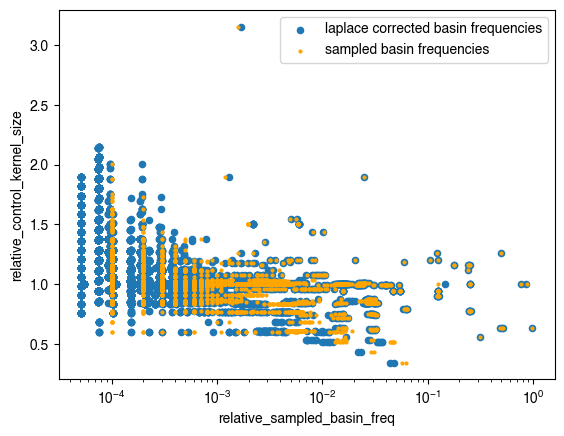

In [89]:
combined_df.plot.scatter('relative_sampled_basin_freq_laplace','relative_control_kernel_size',
                         label='laplace corrected basin frequencies')
combined_df.plot.scatter('relative_sampled_basin_freq','relative_control_kernel_size',
                         color='orange',ax=plt.gca(),s=4,label='sampled basin frequencies')
plt.xscale('log')